
    1. Реализовать алгоритм Евклида поиска наибольшего общего делителя (НОД) целых чисел a и b, используя следующие свойства НОД:
    1) НОД(a, b) = a, если b = 0;
    2) НОД(a, b) = b, если a = 0;
    3) НОД(a, b) = НОД(b, a), если a < b;
    4) НОД(a, b) = НОД(a - b, b), если b  0.

In [9]:
def nod1(a, b):
    if a == 0:
        return b
    elif b == 0:
        return a
    elif a < b:
        return nod1(b, a)
    return nod1(a-b, b)
nod1(20, 80)

20

    2. Другой вариант реализации алгоритма Евклида основан на соотношениях:
    1) НОД(a, b) = a, если b = 0;
    2) НОД(a, b) = b, если a = 0;
    3) НОД(a, b) = НОД(b, a), если a < b;
    4) НОД(a, b) = НОД(b, a mod b), если b  0.

In [10]:
def nod2(a, b):
    if a == 0:
        return b
    elif b == 0:
        return a
    elif a < b:
        return nod1(b, a)
    return nod1(b, a%b)
nod1(20, 80)

20

    3. Реализовать алгоритм поиска НОД с помощью разложения на множители.
Одним из способов нахождения НОД является разложение чисел на простые множители. Алгоритм нахождения наибольшего общего делителя (НОД) двух чисел с помощью разложения на простые множители состоит из следующих шагов:
    1. Разложить каждое число на простые множители.
    2. Определить общие простые множители.
    3. Записать каждый общий множитель столько раз, сколько он встречается в разложении обоих чисел наименьшее количество раз.
    4. Перемножить выбранные множители.

In [19]:
def find_prime(n):
    factors = {}
    i = 2
    while i * i <= n:
        while n % i == 0:
            if i not in factors.keys():
                factors[i] = 0
            factors[i] += 1
            n = n//i
        i += 1
    if n > 1:
        if n not in factors.keys():
            factors[n] = 0 
        factors[n] += 1
    return factors


In [23]:
def nod3(a, b):
    factors_a = find_prime(a)
    factors_b = find_prime(b)

    common_factors = {}
    for factor, count in factors_a.items():
        if factor in factors_b:
            common_factors[factor] = min(count, factors_b[factor])

    nod = 1
    for factor, count in common_factors.items():
        nod *= factor*count
    return nod

nod3(20, 80)


20

In [36]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

def measure_time(func, *args, repeats=10):
    times = []
    for _ in range(repeats):
        start_time = time.perf_counter()
        func(*args)
        end_time = time.perf_counter()
        times.append(end_time - start_time)
    return np.mean(times), np.min(times), np.max(times)

def draw_plot(func1, func2, func3):
    sizes = [10**i for i in range(1, 5)]
    time_gcd_mean = []
    time_gcd_min = []
    time_gcd_max = []

    time_gcd2_mean = []
    time_gcd2_min = []
    time_gcd2_max = []

    time_gcd3_mean = []
    time_gcd3_min = []
    time_gcd3_max = []

    for size in sizes:
        a = random.randint(size//10, size)
        b = 15

        mean_gcd, min_gcd, max_gcd = measure_time(func1, a, b)
        time_gcd_mean.append(mean_gcd)
        time_gcd_min.append(min_gcd)
        time_gcd_max.append(max_gcd)

        mean_gcd2, min_gcd2, max_gcd2 = measure_time(func2, a, b)
        time_gcd2_mean.append(mean_gcd2)
        time_gcd2_min.append(min_gcd2)
        time_gcd2_max.append(max_gcd2)


        mean_gcd3, min_gcd3, max_gcd3 = measure_time(func3, a, b)
        time_gcd3_mean.append(mean_gcd3)
        time_gcd3_min.append(min_gcd3)
        time_gcd3_max.append(max_gcd3)


    plt.figure(figsize=(12, 6))

    plt.plot(sizes, time_gcd_mean, label="func1", marker='o', color='blue')

    plt.fill_between(sizes, time_gcd_min, time_gcd_max, alpha=0.2, color='blue')

    plt.plot(sizes, time_gcd2_mean, label="func2", marker='o', color='orange')
    plt.fill_between(sizes, time_gcd2_min, time_gcd2_max, alpha=0.2, color='orange')

    plt.plot(sizes, time_gcd3_mean, label="func3", marker='o', color='green')
    plt.fill_between(sizes, time_gcd3_min, time_gcd3_max, alpha=0.2, color='green')

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Размер чисел")
    plt.ylabel("Время выполнения (секунды)")
    plt.title("Сравнение")
    plt.legend()
    plt.grid(True)
    plt.show()

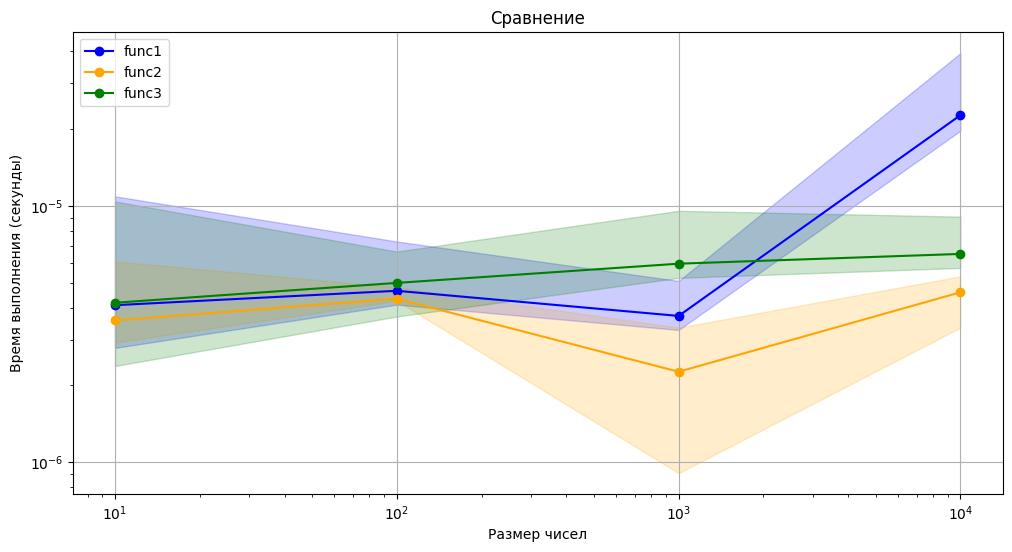

In [37]:
draw_plot(nod1, nod2, nod3)

4. Удаление всех дубликатов из списка
- С использованием множества: Преобразовать список в множество и обратно в список. Сложность: O(n)
- Без множества: Пройтись по списку и добавлять в новый список только уникальные элементы. Сложность: O(n^2)


In [39]:
a = [3, 3, 3, 4, 5, 7, 7, 3, 5, 2, 1]

In [40]:
def remove_dups1(a):
    a = set(a)
    return list(a)
remove_dups1(a)

[1, 2, 3, 4, 5, 7]

In [41]:
def remove_dups2(a):
    res = []
    for el in a:
        if el not in res:
            res.append(el)
    return res
remove_dups2(a)

[3, 4, 5, 7, 2, 1]

In [46]:
def draw_plot2(func1, func2):
    sizes = [10**i for i in range(1, 5)]
    time_gcd_mean = []
    time_gcd_min = []
    time_gcd_max = []

    time_gcd2_mean = []
    time_gcd2_min = []
    time_gcd2_max = []

    time_gcd3_mean = []
    time_gcd3_min = []
    time_gcd3_max = []

    for size in sizes:
        a = [random.randint(1, size) for i in range(size)]
        b = 15

        mean_gcd, min_gcd, max_gcd = measure_time(func1, a)
        time_gcd_mean.append(mean_gcd)
        time_gcd_min.append(min_gcd)
        time_gcd_max.append(max_gcd)

        mean_gcd2, min_gcd2, max_gcd2 = measure_time(func2, a)
        time_gcd2_mean.append(mean_gcd2)
        time_gcd2_min.append(min_gcd2)
        time_gcd2_max.append(max_gcd2)


    plt.figure(figsize=(12, 6))

    plt.plot(sizes, time_gcd_mean, label="func1", marker='o', color='blue')

    plt.fill_between(sizes, time_gcd_min, time_gcd_max, alpha=0.2, color='blue')

    plt.plot(sizes, time_gcd2_mean, label="func2", marker='o', color='orange')
    plt.fill_between(sizes, time_gcd2_min, time_gcd2_max, alpha=0.2, color='orange')

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Размер чисел")
    plt.ylabel("Время выполнения (секунды)")
    plt.title("Сравнение")
    plt.legend()
    plt.grid(True)
    plt.show()

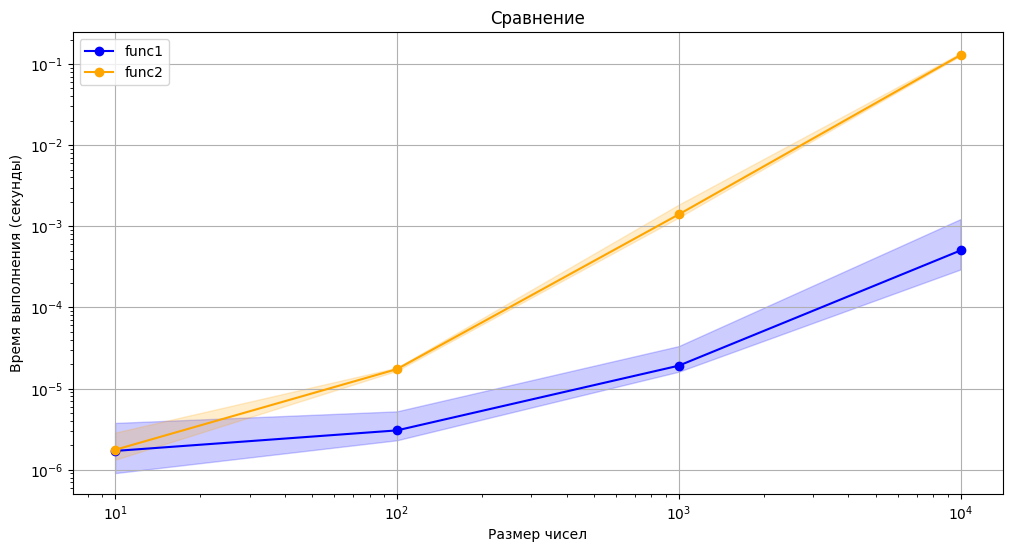

In [47]:
draw_plot2(remove_dups1, remove_dups2)